# ML PIPELINE HANDS-ON PROJECT

GROUP NAME <br>
GROUP MEMBER NAME: 

## Section 1: Conduct simple data exploration and data analysis on the given dataset

### 1)Display the number of attributes available in the dataset (exam_dataset.csv)?

## 2)Find the dimension number of your dataset

### 3) Display the average of these attributes: ‘Age’, ‘Bonus’ and ‘Years atCompany’. Be sure to round your answer to 4 decimal places

### 4) Find the minimum and maximum ‘Bonus’

### 5) What are the departments in this dataset?

### 6) Provide graphical visualization by plotting Histogram of ‘JobSatisfaction’ vs staff numbers’

### 7.Find the correlation between ‘Bonus’ and ‘JobSatisfaction’

### 8.Based on your findings, discuss briefly (you can either use comments/markdown to write your answer) on:

- **Range of bonus at Company A** <br>
    . <br>


- **Most and Least Frequent JobSatisfaction at Company A** <br>
   .   <br>
 

- **Discuss your observation on the distribution of bonus values** <br>
     <br>


- **Is there a linear relationship between bonus and JobSatisfaction at the company??**<br>
   .

Section 2) Classification using Random Forest for: ‘Age’, ‘BusinessTravel’, ‘MonthlyIncome’ and ‘JobSatisfaction’ to predict ‘Attrition’. Sample steps are as below:”

### 1) Import necessary libraries

### 2) Import dataset

### 3) Allocate the relevant attributes as input and output

### 4) Use LabelEncoder to encode categorical data

### 5) Split your data into training and test sets with the appropriate proportions

### 6) Normalized your data using StandardScaler

### 7) Fit the and predict results using the Naïve Bayes Classifier

### 8) Evaluate your results using confusion matrix and calculate the prediction accuracy

### 9) Discuss your results and findings

- our main concern is to find the classification of attrition rate by considering the Age,BusinessTravel  MonthlyIncome and JobSatisfaction. 
- Our **independent** variables `Age`, `BusinessTravel`, `MonthlyIncome` and `JobSatisfaction`
- Our **dependent** variable: `Attrition`
- One of the attributes which is `Business Travel` consist of categorical data. Thus we encode the attribute before applying the model.
- Using Random Forest Classifier model, we used 80% of the observations (train set) and fit in our model. While the remaining 20% are used to test the accuracy of the model.
- The model has 79.93197278911565% accuracy.


## Section 3 : Clustering comparison between K-Means and DBSCAN

## A) Perform K-Means clustering (use WCSS to help find best K value) on the givendataset, display clustering results with graphical visualization, provide any necessarycomments and discussions.

### 1) Import necessary libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

### 2) Import dataset

In [8]:
# Load the dataset
data = pd.read_csv('clustering_PROJECT_Part2.csv')

# Display the first few rows of the dataset
print(data.head())

   Unnamed: 0         A         B
0           0  0.329241  0.841783
1           1  1.697407 -0.236075
2           2 -0.831460  0.584743
3           3  1.825271 -0.297894
4           4  1.236577  0.121528


#### Discussion 

- Based on WCSS, the optimized number of clusters is 4.
- The silhouette score using KMeans is:  0.4329118241119466


B) Perform DBSCAN clustering (use knee locator to help find optimal parameter) on thegiven dataset, display clustering results with graphical visualization, provide any necessary comments and discussions.

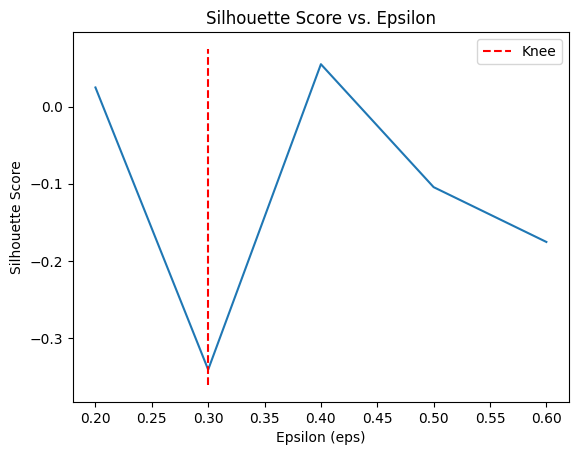

Optimal Epsilon: 0.30000000000000004


In [9]:
# Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Define a range of epsilon values to evaluate
eps_values = np.linspace(0.1, 5, num=50)

# Initialize lists to store silhouette scores and epsilon values
silhouette_scores = []
eps_list = []

# Perform DBSCAN clustering for each epsilon value
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(scaled_data)
    
    # Ignore outliers (-1) when calculating the silhouette score
    if np.unique(labels).size > 1:
        score = silhouette_score(scaled_data, labels)
        silhouette_scores.append(score)
        eps_list.append(eps)

# Find the knee point using the KneeLocator
knee = KneeLocator(eps_list, silhouette_scores, curve="convex", direction="decreasing")

# Plot the silhouette scores and knee point
plt.plot(eps_list, silhouette_scores)
plt.xlabel("Epsilon (eps)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Epsilon")
plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles="--", colors="r", label="Knee")
plt.legend()
plt.show()

# Retrieve the optimal epsilon value
optimal_eps = knee.knee

print("Optimal Epsilon:", optimal_eps)

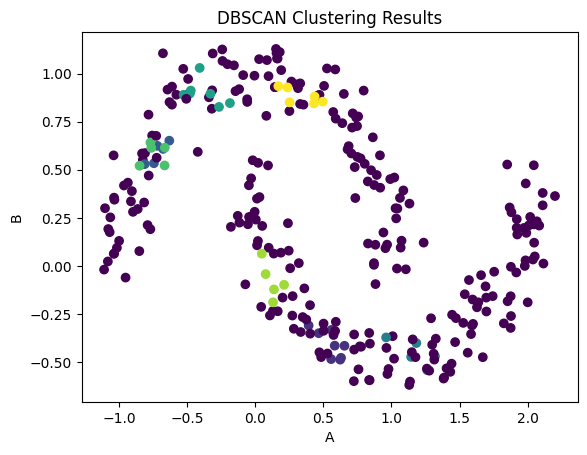

In [12]:
# Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


# Define the optimal epsilon value
optimal_eps = 0.3  # Update with the optimal epsilon value found using KneeLocator

# Perform DBSCAN clustering with the optimal epsilon value
dbscan = DBSCAN(eps=optimal_eps)
labels = dbscan.fit_predict(scaled_data)

# Plot the clusters
plt.scatter(data['A'], data['B'], c=labels)
plt.xlabel("A")
plt.ylabel("B")
plt.title("DBSCAN Clustering Results")
plt.show()

#### Discussion 
- The optimized parameter for knee is .
- The silhouette score using DBSCAN is:  .

C) Conduct comparison studies on the two techniques (K-Means and DBSCAN), with graphical visualization comparisons, discuss your results and decide on whether:

- Graph 1 and Graph 2 shown how the data being clusterized by K-mean and DBSCAN. 
- Generally silhouette score use to measure the accuracy of model in clustering the data. Basically, The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
- For this data, we find that the K-Mean have 0.4329118241119466 silhouette score, meanwhile the DBSCAN have 0.2144392865052958. silhouette score.
- General understnding of Silhouette score justify that the `K-Means is the better clustering technique for this dataset`
- On the other hand based on the figures plotted, the 2 clusters from DBSCAN is best-suited to represent the sinusoidal-like behaviour of the data in comparison with output from K-Means where there are 4 clusters.
- Hence, `There’s no clear distinction between the two techniques for this dataset`

2.0


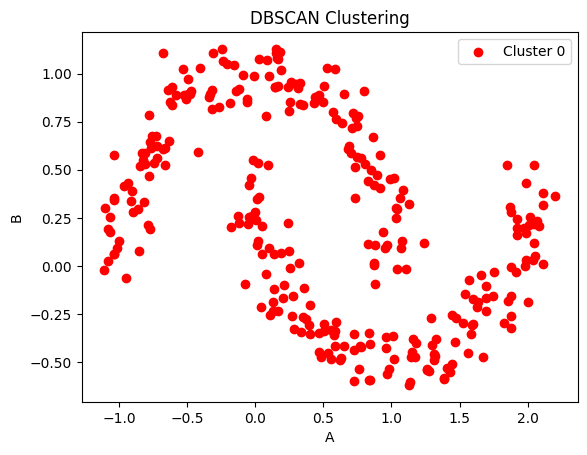

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Load the data from CSV

data = pd.read_csv('clustering_PROJECT_Part2.csv')

data

# Extract the features from the data

X = data[['A', 'B']].values

# Determine the range of parameter values

eps_values = np.linspace(0.1, 2.0, num=20)

# Compute the distance matrix

distance_matrix = np.array([[np.linalg.norm(x1 - x2) for x2 in X] for x1 in X])

# Calculate the neighborhood density

density_values = [np.sum(distance_matrix < eps) for eps in eps_values]

# Use knee locator to find the optimal parameter

knee = KneeLocator(eps_values, density_values, curve='concave', direction='decreasing')

optimal_eps = knee.knee

print(optimal_eps)


# Perform DBSCAN clustering

dbscan = DBSCAN(eps=optimal_eps, min_samples=5)

labels = dbscan.fit_predict(X)


# Visualize the clusters

unique_labels = np.unique(labels)

colors = ['r', 'g', 'b', 'y', 'c', 'm']


for label in unique_labels:

    cluster_points = X[labels == label]

    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[label], label=f'Cluster {label}')


plt.xlabel('A')

plt.ylabel('B')

plt.title('DBSCAN Clustering')

plt.legend()

plt.show()